# Algoritm inteligent + small data

### Cerinte laborator
* se va cauta un set de date mic care sa fie relevant pentru problema propusa - de preferat un set de date real dar mic (ex: 100-200 de exemple); se va descrie sursa datelor si modul in care au fost colectate; daca se foloseste un set de date real, se vor respecta toate regulile etice si legale privind utilizarea datelor (ex: GDPR, drepturi de autor, etc.)
& se va alege un algoritm de AI (machine learning/deep learning) care sa rezolve problema propusa; se va implementa si antrena un model folosind un set mic de date (small data) - de exemplu, un set de date sintetic, sau un set de date real dar mic (ex: 100-200 de exemple); se poate porni antrenarea de la 0 sau se poate folosi transfer learning (pornind de la un model pre-antrenat pe un set de date similar cu cel folosit in proiect)
* Descriere si scurta EDA a datelor
* Descriere algoritm inteligent - se va descrie pe scurt algoritmul ales, motivatia alegerii lui, librariile folosite, etc.
* Descriere metodologie experimentala si rezultate obtinute - se vor descrie detalii precum:
* cum s-a impartit setul mic de date (train/val/test),
* ce metrici s-au folosit pentru evaluare,
* ce hiperparametri s-au folosit,
* ce rezultate s-au obtinut (metrici + cateva exemple corect/gresit prezise)

## Read dataset

Am folosit un set de date care contine informatii despre simptomele si bolile asociate acestora. Setul de date include 17 simptome si un numar de boli, fiecare fiind asociata cu o combinatie de simptome. Fiecare boala este descrisa de o lista de simptome, iar obiectivul este sa construim un model care sa prezica boala pe baza simptomelor prezentate.
### Prelucrarea datelor:
* Simptomele sunt codificate in format binar (1 pentru simptom prezent, 0 pentru simptom absent).
* Eticheta boala este codificata cu ajutorul unui LabelEncoder in valori numerice pentru a fi utilizata de catre modelul de invatare automata

* Verificarea dimensiunilor si primelor randuri de date, precum si posibilele valori lipsa
* Transforma fiecare coloana de simptome in variabile binare (1 = simptom prezent, 0 = absent)
* Cream X (features) - symptoms și y (label) - disease

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('DiseaseAndSymptoms.csv')

df.fillna(0, inplace=True)

symptom_columns = [f"Symptom_{i}" for i in range(1, 18)]

X = df[symptom_columns].apply(lambda x: x.apply(lambda val: 1 if isinstance(val, str) and val != '0' else 0))
print(X.head())

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Disease'])
print("Distributia bolilor:", y)

   Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0          1          1          1          1          0          0   
1          1          1          1          0          0          0   
2          1          1          1          0          0          0   
3          1          1          1          0          0          0   
4          1          1          1          0          0          0   

   Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           0           0   

   Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0           0           0           0           0           0  


* Impartim setul de date in training si test (70% training, 30% test)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Trees in the forest use the best split strategy, i.e. equivalent to passing splitter="best" to the underlying DecisionTreeClassifier. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

### Motivatia alegerii:
* Random Forest este usor de utilizat, nu necesita prea multa preprocesare si este capabil sa gestioneze atat date binare, cat si date continue.
* Este un model multi-clasa, ceea ce il face ideal pentru acest tip de problema, avand in vedere ca avem mai multe boli (clase) de prezis.
* Folosirea parametrului class_weight='balanced' ajuta la gestionarea unui set de date dezechilibrat, alocand mai multa greutate claselor mai putin frecvente.

* creare model Random Forest
* antrenare cu fit
* prezice etichete pe setul de test
* evaluare perfomanta

### Antrenarea modelului
Am antrenat un model RandomForestClassifier cu 100 de estimatori (arbori) si cu class_weight='balanced' pentru a gestiona clasele dezechilibrate.

### Evaluarea performantei modelului

Am evaluat modelul folosind Raportul de clasificare si Matricea de confuzie.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00        18
                                   AIDS       0.00      0.00      0.00        30
                                   Acne       0.00      0.00      0.00        24
                    Alcoholic hepatitis       0.00      0.00      0.00        25
                                Allergy       0.15      0.46      0.22        24
                              Arthritis       0.07      0.52      0.12        23
                       Bronchial Asthma       0.00      0.00      0.00        33
                   Cervical spondylosis       0.00      0.00      0.00        23
                            Chicken pox       0.00      0.00      0.00        21
                    Chronic cholestasis       0.17      0.60      0.27        15
                            Common Cold       1.00      0.57      0.72        23
                           

C:\Users\tapuc\Desktop\University\Semester 5\MIRPR\Tema2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\tapuc\Desktop\University\Semester 5\MIRPR\Tema2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\tapuc\Desktop\University\Semester 5\MIRPR\Tema2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

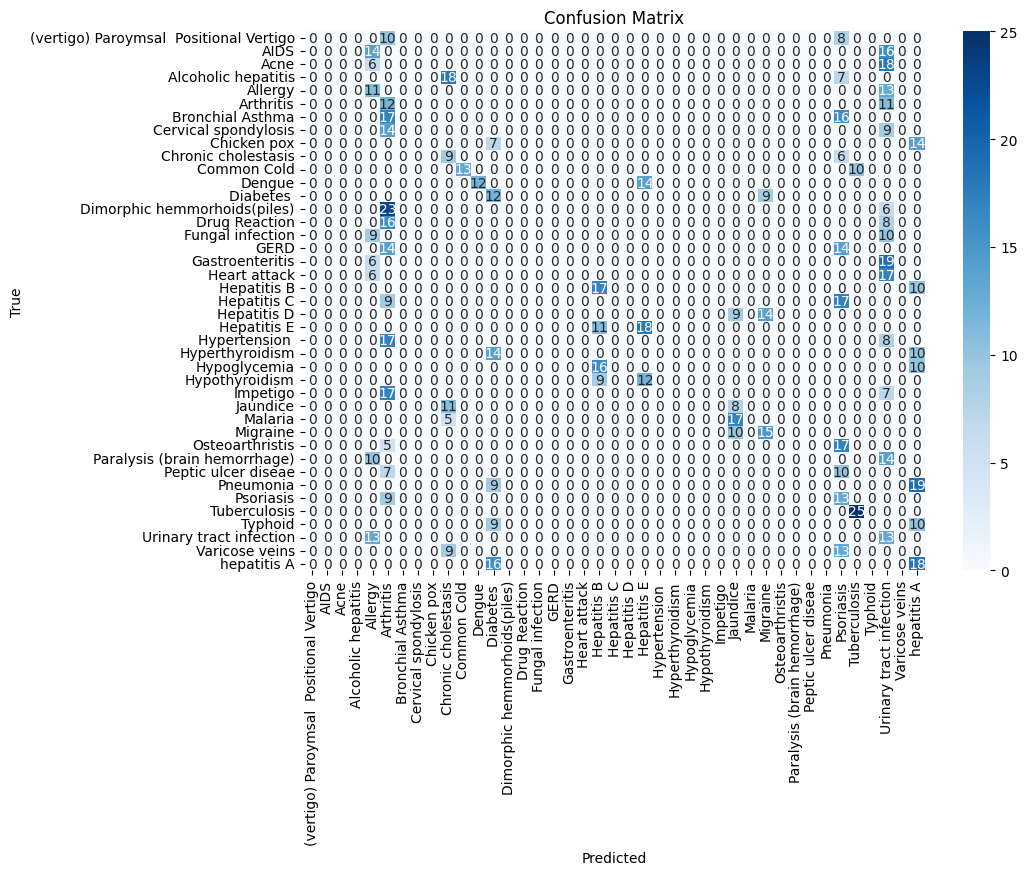

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Rezultate

Modelul a oferit rezultate cu o acuratețe de 20%. Performanța modelului poate fi îmbunătățită prin ajustarea hiperparametrilor, aplicarea tehnicilor de sampling pentru echilibrarea datelor și folosirea unor tehnici de preprocesare mai avansate.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [27]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [0.12195122 0.1046748  0.21443089 0.17073171 0.17073171]
Mean cross-validation score: 0.15650406504065043


In [29]:
# Afișează primele 10 exemple corecte și greșite
correct = [(true, pred) for true, pred in zip(y_test[:10], y_pred[:10]) if true == pred]
incorrect = [(true, pred) for true, pred in zip(y_test[:10], y_pred[:10]) if true != pred]

print("Exemple corect prezise:")
for true, pred in correct:
    print(f"True: {label_encoder.classes_[true]}, Pred: {label_encoder.classes_[pred]}")

print("\nExemple gresit prezise:")
for true, pred in incorrect:
    print(f"True: {label_encoder.classes_[true]}, Pred: {label_encoder.classes_[pred]}")


Exemple corect prezise:
True: Chronic cholestasis, Pred: Chronic cholestasis
True: Hepatitis B, Pred: Hepatitis B
True: Migraine, Pred: Migraine

Exemple gresit prezise:
True: Acne, Pred: Allergy
True: Acne, Pred: Urinary tract infection
True: Hyperthyroidism, Pred: hepatitis A
True: AIDS, Pred: Urinary tract infection
True: Hypertension , Pred: Arthritis
True: Hypoglycemia, Pred: Hepatitis B
True: Arthritis, Pred: Urinary tract infection
